# Imports

In [1]:
using EpistemicNetworkAnalysis
using DataFrames
using CSV
using Plots

# Data

In [2]:
data = ena_dataset("shakespeare.data") # an example dataset packaged in EpistemicNetworkAnalysis

,X,RowID,Type,Play,Act,Scene,Utterance_Index,Line_Index
,Int64,Int64,String7,String31,Int64,Int64,Int64,String
1,1,1,tragedy,Hamlet,1,1,1,1.1.1
2,2,2,tragedy,Hamlet,1,1,2,1.1.2
3,3,3,tragedy,Hamlet,1,1,3,1.1.3
4,4,4,tragedy,Hamlet,1,1,4,1.1.4
5,5,5,tragedy,Hamlet,1,1,5,1.1.5
6,6,6,tragedy,Hamlet,1,1,6,1.1.6
7,7,7,tragedy,Hamlet,1,1,7,1.1.7
8,8,8,tragedy,Hamlet,1,1,8,1.1.8 / 1.1.9
9,9,9,tragedy,Hamlet,1,1,9,1.1.10


# Model

In [3]:
conversations = [:Play, :Act]
units = [:Play, :Speaker]
codes = [
    :Love,
    :Death,
    :Honor,
    :Men,
    :Women
]

rotation = MeansRotation(:Play, "Romeo and Juliet", "Hamlet")

myENA = ENAModel(data, codes, conversations, units, rotateBy=rotation)

ENAModel{MeansRotation}([:Love, :Death, :Honor, :Men, :Women], [:Play, :Act], [:Play, :Speaker], MeansRotation(GLM.LinearModel, 2, y ~ 1 + FactoredGroupVar, nothing, :Play, "Romeo and Juliet", "Hamlet"), 71×13 DataFrame
 Row │ ENA_UNIT                          pos_x       pos_y        Love_Death   ⋯
     │ String                            Float64     Float64      Real         ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Hamlet.BERNARDO                    0.511084    0.319826     0.0         ⋯
   2 │ Hamlet.FRANCISCO                  -0.164501    0.421511     0
   3 │ Hamlet.HORATIO                     0.415271   -0.198699     0.0505076
   4 │ Hamlet.MARCELLUS                   0.524707    0.169398     0.0
   5 │ Hamlet.KING CLAUDIUS               0.0769615  -0.374933     0.436852    ⋯
   6 │ Hamlet.VOLTIMAND                  -0.164501    0.421511     0
   7 │ Hamlet.LAERTES                     0.214341   -0.360073     0.256307
   8 │ Hamlet

# Plotting

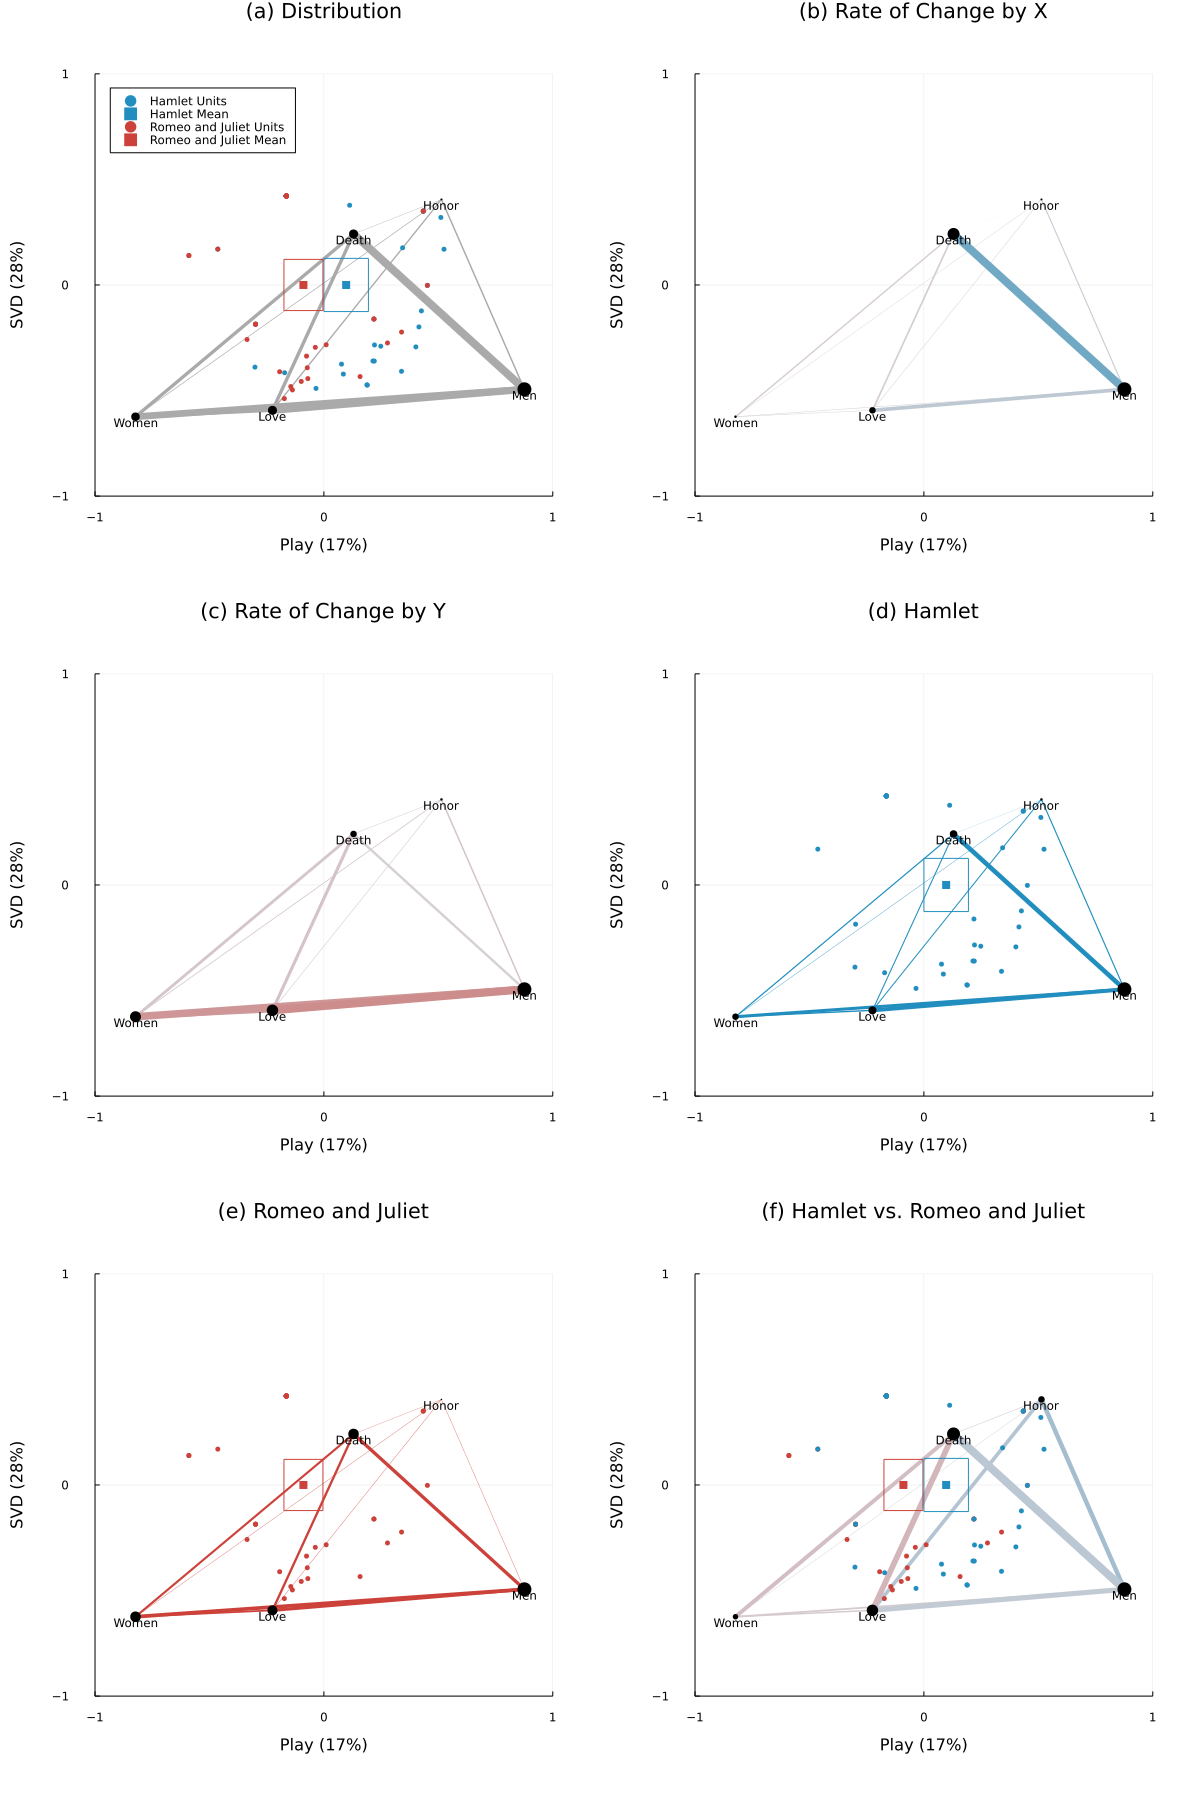

In [4]:
plot(myENA)